In [2]:
import random

import matplotlib.pyplot as plt
import torch

from embeddings.common.gnfr_sector import GnfrSector
from embeddings.common.log import logger
from embeddings.dataset.tno_dataset_collection import TnoDatasetCollection
from embeddings.models.common.metrics import mse, ssim, relative_error
from embeddings.models.vae.vae import VariationalAutoEncoder
from embeddings.plotting.city_emission_field_plot import plot_emission_field_tensor

In [3]:
MODEL_NAME = "2048"

vae = VariationalAutoEncoder.load(model_name=MODEL_NAME)

In [4]:
dataset_collection = TnoDatasetCollection()

[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2015_highres_by_city.csv'
[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2018_highres_by_city.csv'
[INFO] > Test Set has 13 unique cites!                          
	Magdeburg, Szczecin, Siegen, Hamburg, Dresden, Innsbruck, Reims, Aachen, Großzschocher, Gdynia, Duisburg, Győr, Prague
[INFO] > Validation Set has 15 unique cites!
	Frankfurt am Main, Angers, Erfurt, Kalisz, Kassel, Bydgoszcz, Koblenz, Zielona Góra, Ingolstadt, Bielefeld, Wałbrzych, Linz, Nijmegen, Southampton, Brussels
[INFO] > Training Set has 74 unique cites!
	Nürnberg, Stuttgart, Köln, Amsterdam, Rouen, Kiel, Bremerhaven, Southend-on-Sea, Nantes, Besançon, Kingston upon Hull, Tours, Liberec, Freiburg, Metz, Odense, Gorzów Wielkopolski, Reading, Augsburg, Le Mans, Mannheim, Ulm, Sheffield, Eindhoven, Münster, Brighton, Koszalin, Op

In [10]:
data = dataset_collection.test_data

emission_field = data[random.randint(0, len(data) - 1)]

In [11]:
reconstructed = vae.reconstruct(emission_field)

In [12]:
sector_to_plot = GnfrSector.F2
vmax = 1.1 * float(torch.max(emission_field))

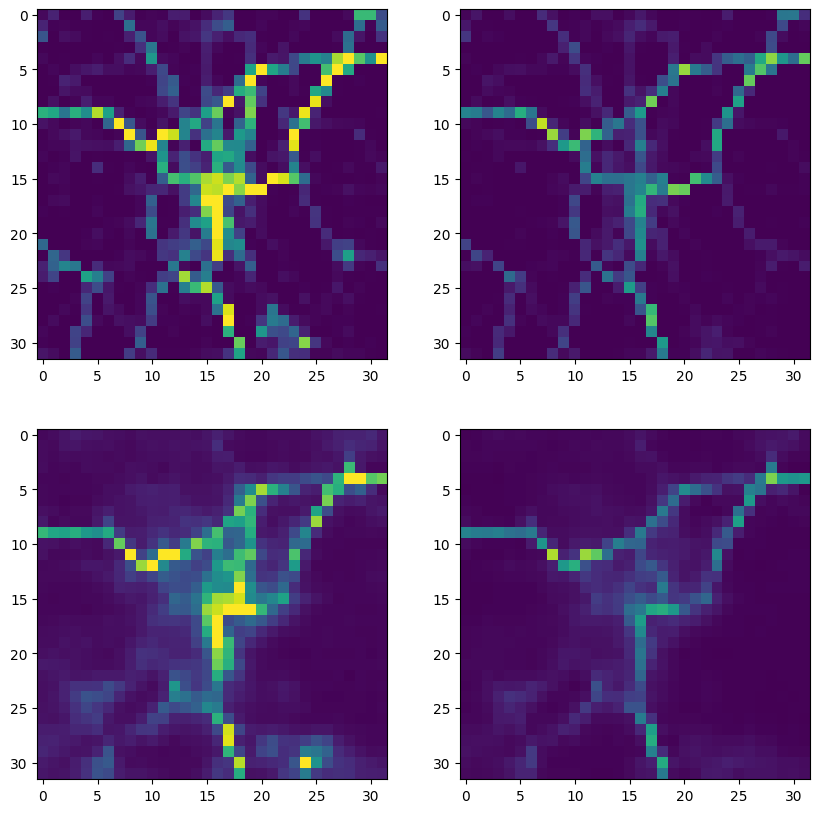

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_emission_field_tensor(emission_field=emission_field, ax=ax1, vmax=vmax)
plot_emission_field_tensor(emission_field=emission_field, ax=ax2, sector=sector_to_plot, vmax=vmax)

plot_emission_field_tensor(emission_field=reconstructed, ax=ax3, vmax=vmax)
plot_emission_field_tensor(emission_field=reconstructed, ax=ax4, sector=sector_to_plot, vmax=vmax)

In [14]:
logger.info(f"MSE: {mse(x=emission_field, x_hat=reconstructed)}")
logger.info(f"SSIM: {ssim(x=emission_field, x_hat=reconstructed)}")
logger.info(f"Relative Error: {relative_error(x=emission_field, x_hat=reconstructed)}")

[INFO] > MSE: 0.02619970589876175
[INFO] > SSIM: 0.8873334527015686
[INFO] > Relative Error: 0.5316883325576782
